In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [186]:
h = np.vectorize(lambda x : np.log(x))
h_inv = np.vectorize(lambda x : np.exp(x))

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [188]:
df = pd.read_csv("./data_synthetic/synth_data_1var_poi_2.csv", index_col=0)
df

,X,y
0,1,0.010676
1,1,0.010120
2,1,0.010200
3,1,0.010130
4,1,0.010153
...,...,...
145,18,0.000811
146,18,0.000049
147,18,0.000609
148,18,0.000393


In [189]:
X = df['X'].to_numpy().reshape(-1, 1)
y = df['y'].to_numpy().reshape(-1,1)

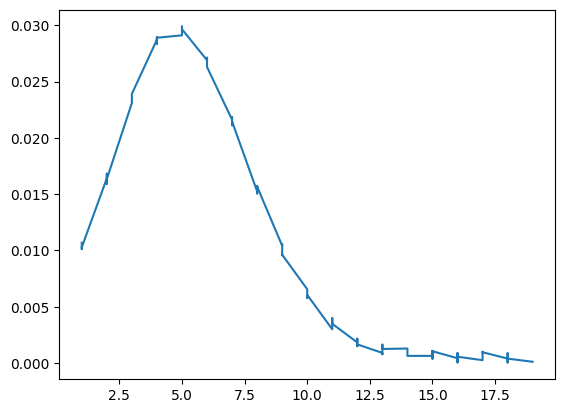

In [190]:
plt.plot(X,y)

In [191]:
X.shape, y.shape

((150, 1), (150, 1))

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
regr = LinearRegression()
regr.fit(X_train, h(y_train))

y_pred = h_inv(regr.predict(X))

print("Coefficients: \n", regr.coef_)
print(f"Mean squared error: {mean_squared_error(y, y_pred)}")
print(f"Coefficient of determination: {r2_score(y, y_pred)}")

Coefficients: 
 [[-0.27813914]]
Mean squared error: 0.00013813797121570504
Coefficient of determination: -0.23738840542523154


In [195]:
y_pred.sum()

np.float64(1.5780858569930631)

In [196]:
y_test.sum()

np.float64(0.36655797949925095)

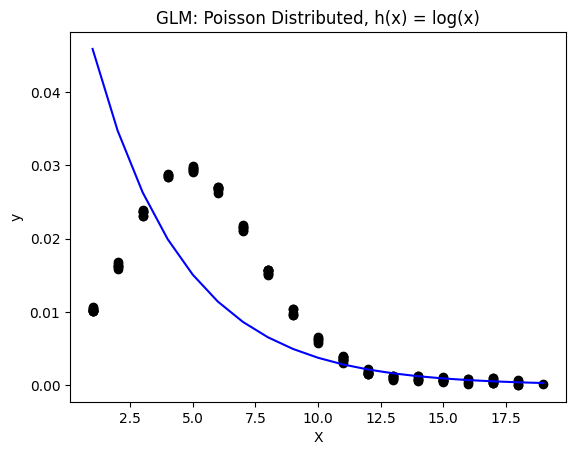

In [197]:
plt.scatter(X_train, y_train, color="black")
plt.plot(X, y_pred, color="blue")
plt.xlabel("X")
plt.ylabel("y")
plt.title("GLM: Poisson Distributed, h(x) = log(x)")
plt.show()